In [27]:
import csv
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt  

In [11]:
import os
BIGQUERY_PROJECT = 'cloud-test-ironhacks'
BIGQUERY_KEYPATH = '../../../cloud-test-ironhacks-65dd0613ac9e.json'

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = BIGQUERY_KEYPATH
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [12]:
query = """
SELECT * FROM `cloud-test-ironhacks.weather.combined_weather`
"""

query_job = bigquery_client.query(query)
data = query_job.to_dataframe()
data.head()

,date,max_rel_humidity,max_temperature,mean_temperature,min_rel_humidity,min_temperature,potential_water_deficit,precipitation_data,wind_speed
0,2019-08-10,90.5813,28.3985,21.5126,39.8397,14.6268,-4.8887,0.0,2.1004
1,2019-08-24,91.3571,24.6652,18.6607,44.4712,12.6562,-4.7381,0.0,4.4706
2,2019-08-28,93.9562,25.3146,18.8246,43.4746,12.3346,-4.7147,0.0,4.3852
3,2019-09-04,99.9498,25.4570,18.6242,56.4720,11.7913,-3.6142,0.0,3.6461
4,2019-09-17,96.1398,26.9347,20.6516,46.6763,14.3685,-4.1923,0.0,4.0712


We want to predict the max_temperature depending upon the min_temperature recorded. Therefore our attribute set will consist of the min_temperature column which is stored in the X variable, and the label will be the max_temperature column which is stored in y variable.

In [13]:
X = data['min_temperature'].values.reshape(-1,1)
y = data['max_temperature'].values.reshape(-1,1)

## We split 80% of the data to the training set while 20% of the data to test set using below code

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Time to train our algorithm with LinearRegression() class

In [17]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

## Check the value of the intercept and slop calculated by the linear regression algorithm

In [18]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[10.37781564]
[[1.07034603]]


## See how accurately our algorithm predicts the percentage score with test data

In [21]:
y_pred = regressor.predict(X_test)

## Compare the actual output values for X_test with the predicted values

In [24]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,-2.5306,-2.211059
1,19.9006,17.078182
2,29.8013,29.808984
3,5.2792,14.249364
4,9.1528,7.898787
...,...,...
68,10.5137,11.973487
69,17.4173,16.363833
70,27.7318,29.075904
71,30.2206,34.309789


## Visualize comparison result as a bar graph with just 25 results

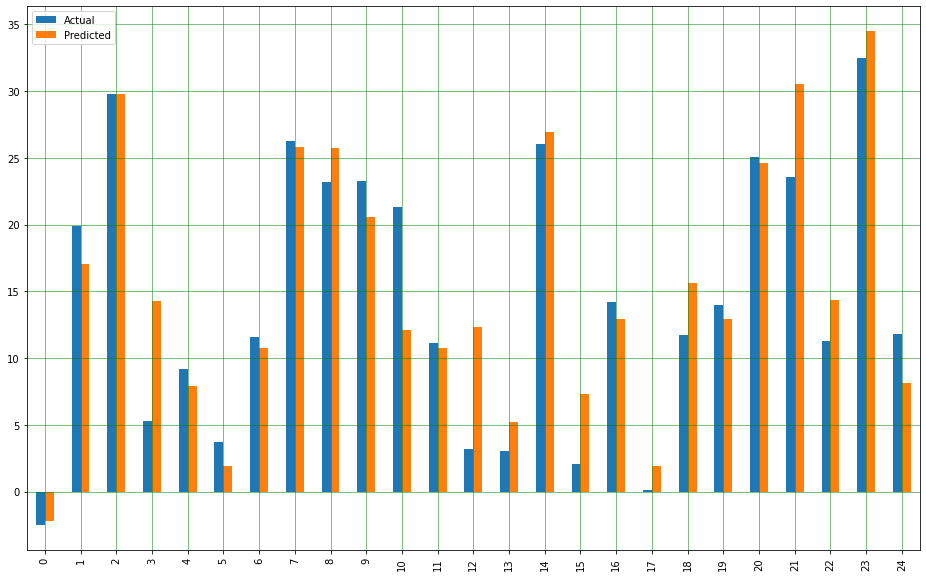

In [28]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Plot straight line with test data

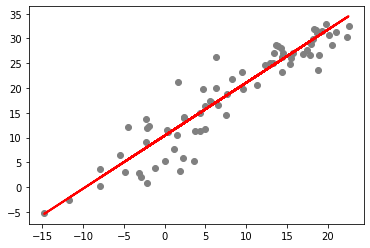

In [29]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

## Evaluate the performance of the algorithm

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.7232652651850984
Mean Squared Error: 12.973994462130191
Root Mean Squared Error: 3.6019431508742876


Root mean squared error is 3.6, which is more than 10% of the mean value of the percentages of all the temperature. This means that our algorithm was not very accurate but can still make reasonably good predictions.